In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [62]:
import warnings

warnings.filterwarnings('ignore')

In [63]:
data = '/content/Social_Network_Ads.csv'
df = pd.read_csv(data)

In [64]:
df.shape

(400, 5)

In [65]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [66]:
col_names = df.columns

col_names

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [68]:
categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 1 categorical variables

The categorical variables are : ['Gender']


In [69]:
df[categorical].head()

,Gender
0,Male
1,Male
2,Female
3,Female
4,Male


In [70]:
df[categorical].isnull().sum()

,0
Gender,0


In [71]:
for var in categorical:

    print(df[var].value_counts())

Gender
Female    204
Male      196
Name: count, dtype: int64


In [72]:
for var in categorical:

    print(var, ' contains ', len(df[var].unique()), ' labels')

Gender  contains  2  labels


In [73]:
print('Gender contains', len(df.Gender.unique()), 'labels')

Gender contains 2 labels


In [74]:
df.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [75]:
df.Gender.value_counts()

,count
Gender,
Female,204
Male,196


In [76]:
pd.get_dummies(df.Gender, drop_first=True).head()

,Male
0,True
1,True
2,False
3,False
4,True


In [77]:
numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 4 numerical variables

The numerical variables are : ['User ID', 'Age', 'EstimatedSalary', 'Purchased']


In [78]:
df[numerical].head()

,User ID,Age,EstimatedSalary,Purchased
0,15624510,19,19000,0
1,15810944,35,20000,0
2,15668575,26,43000,0
3,15603246,27,57000,0
4,15804002,19,76000,0


In [79]:
df[numerical].isnull().sum()

,0
User ID,0
Age,0
EstimatedSalary,0
Purchased,0


In [80]:
print(round(df[numerical].describe()),2)

          User ID    Age  EstimatedSalary  Purchased
count       400.0  400.0            400.0      400.0
mean   15691540.0   38.0          69742.0        0.0
std       71658.0   10.0          34097.0        0.0
min    15566689.0   18.0          15000.0        0.0
25%    15626764.0   30.0          43000.0        0.0
50%    15694342.0   37.0          70000.0        0.0
75%    15750363.0   46.0          88000.0        1.0
max    15815236.0   60.0         150000.0        1.0 2


Text(0, 0.5, 'Purchased')

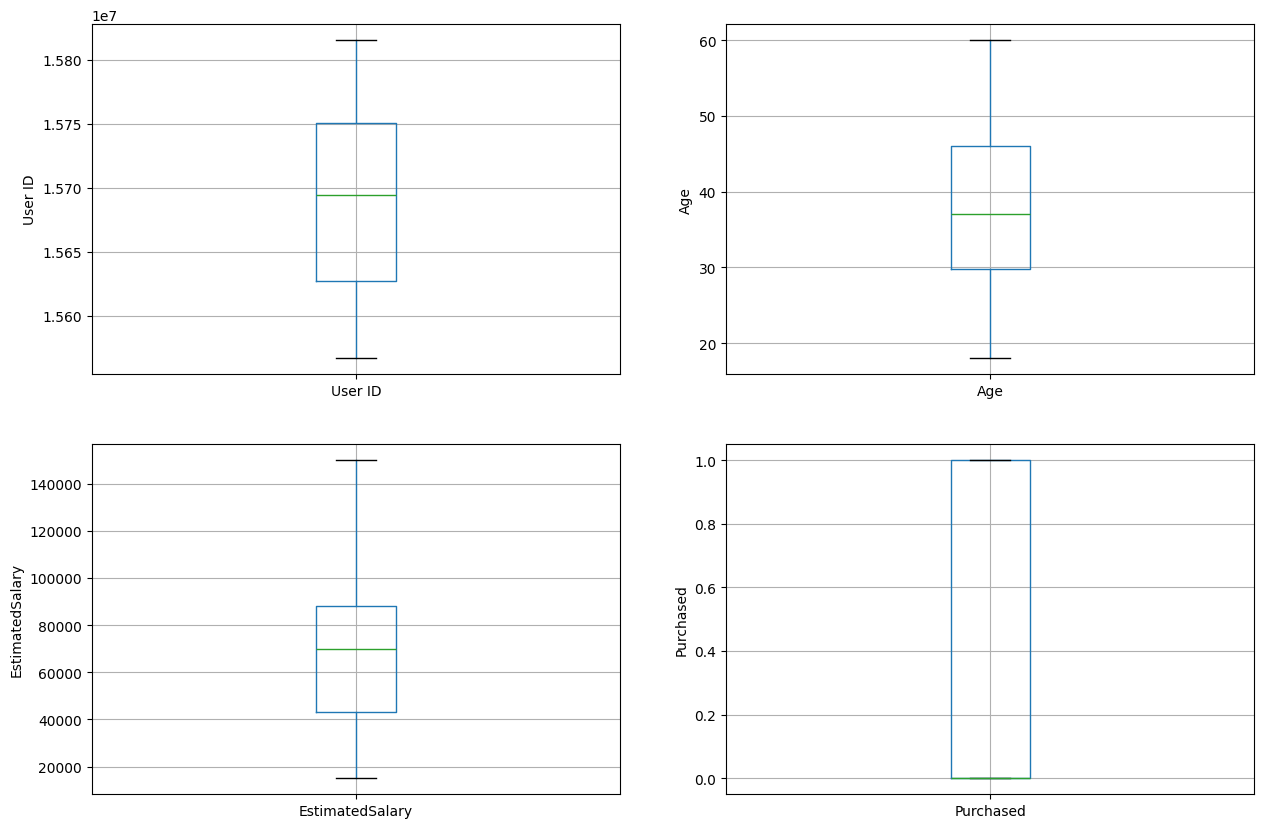

In [81]:
plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.boxplot(column='User ID')
fig.set_title('')
fig.set_ylabel('User ID')


plt.subplot(2, 2, 2)
fig = df.boxplot(column='Age')
fig.set_title('')
fig.set_ylabel('Age')


plt.subplot(2, 2, 3)
fig = df.boxplot(column='EstimatedSalary')
fig.set_title('')
fig.set_ylabel('EstimatedSalary')


plt.subplot(2, 2, 4)
fig = df.boxplot(column='Purchased')
fig.set_title('')
fig.set_ylabel('Purchased')

Text(0, 0.5, 'Purchased')

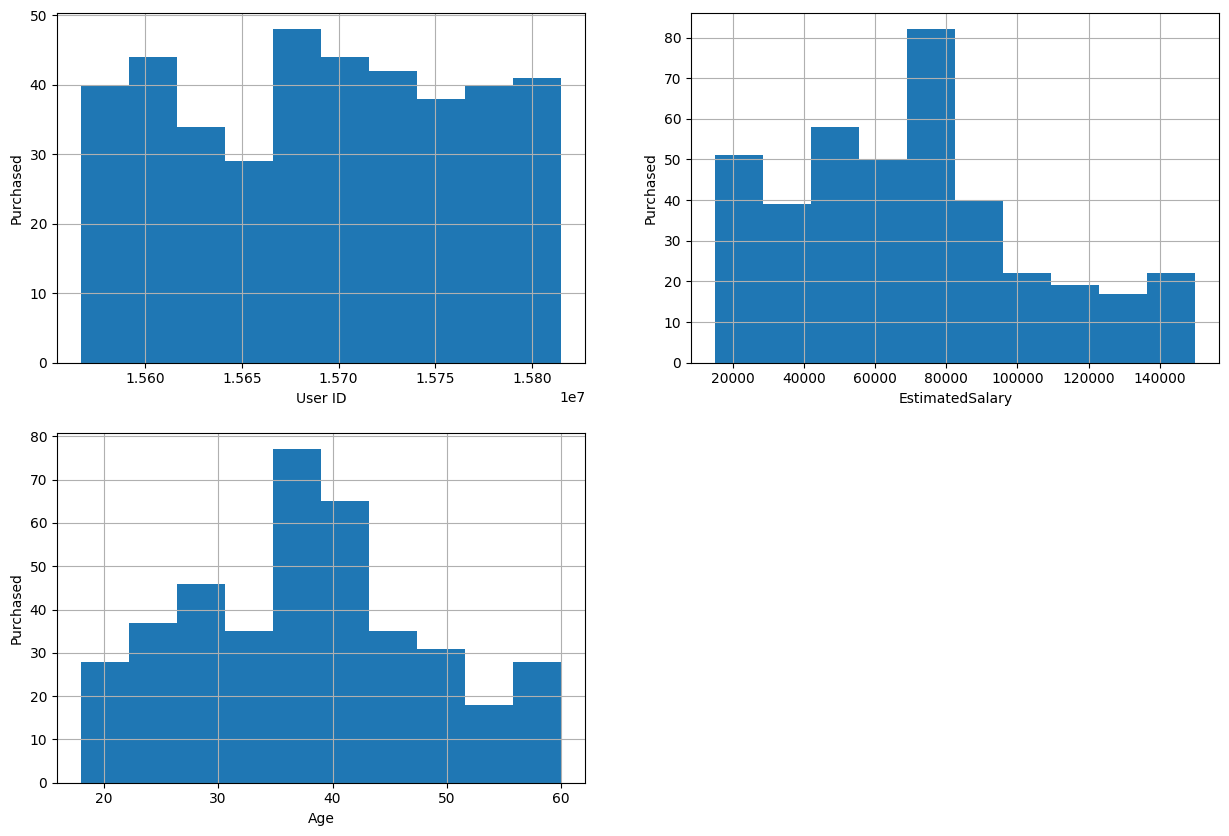

In [82]:
plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df['User ID'].hist(bins=10)
fig.set_xlabel('User ID')
fig.set_ylabel('Purchased')


plt.subplot(2, 2, 2)
fig = df['EstimatedSalary'].hist(bins=10)
fig.set_xlabel('EstimatedSalary')
fig.set_ylabel('Purchased')


plt.subplot(2, 2, 3)
fig = df['Age'].hist(bins=10)
fig.set_xlabel('Age')
fig.set_ylabel('Purchased')


In [83]:
IQR = df['User ID'].quantile(0.75) - df['User ID'].quantile(0.25)
Lower_fence = df['User ID'].quantile(0.25) - (IQR * 3)
Upper_fence = df['User ID'].quantile(0.75) + (IQR * 3)
print('User ID outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

IQR = df['Age'].quantile(0.75) - df['Age'].quantile(0.25)
Lower_fence = df['Age'].quantile(0.25) - (IQR * 3)
Upper_fence = df['Age'].quantile(0.75) + (IQR * 3)
print('Age outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

IQR = df['EstimatedSalary'].quantile(0.75) - df['EstimatedSalary'].quantile(0.25)
Lower_fence = df['EstimatedSalary'].quantile(0.25) - (IQR * 3)
Upper_fence = df['EstimatedSalary'].quantile(0.75) + (IQR * 3)
print('EstimatedSalary outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

IQR = df['Purchased'].quantile(0.75) - df['Purchased'].quantile(0.25)
Lower_fence = df['Purchased'].quantile(0.25) - (IQR * 3)
Upper_fence = df['Purchased'].quantile(0.75) + (IQR * 3)
print('Purchased outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

User ID outliers are values < 15255966.0 or > 16121160.75
Age outliers are values < -19.0 or > 94.75
EstimatedSalary outliers are values < -92000.0 or > 223000.0
Purchased outliers are values < -3.0 or > 4.0


In [84]:
# Assuming 'Purchased' is your target variable, you can drop it to create your features (X)
X = df.drop(['Purchased'], axis=1)

# And assign the 'Purchased' column to your target variable (y)
y = df['Purchased']

# Display the first few rows of X and y to confirm
display(X.head())
display(y.head())

,User ID,Gender,Age,EstimatedSalary
0,15624510,Male,19,19000
1,15810944,Male,35,20000
2,15668575,Female,26,43000
3,15603246,Female,27,57000
4,15804002,Male,19,76000


,Purchased
0,0
1,0
2,0
3,0
4,0


In [85]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [86]:
X_train.shape, X_test.shape

((320, 4), (80, 4))

In [87]:
X_train.dtypes

,0
User ID,int64
Gender,object
Age,int64
EstimatedSalary,int64


In [88]:
categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']

categorical

['Gender']

In [89]:
numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']

numerical

['User ID', 'Age', 'EstimatedSalary']

In [90]:
X_train[numerical].isnull().sum()

,0
User ID,0
Age,0
EstimatedSalary,0


In [91]:
X_test[numerical].isnull().sum()

,0
User ID,0
Age,0
EstimatedSalary,0


In [92]:
for col in numerical:
    if X_train[col].isnull().mean()>0:
        print(col, round(X_train[col].isnull().mean(),4))

In [93]:
for df1 in [X_train, X_test]:
    for col in numerical:
        col_median=X_train[col].median()
        df1[col].fillna(col_median, inplace=True)

In [94]:
X_train[numerical].isnull().sum()

,0
User ID,0
Age,0
EstimatedSalary,0


In [95]:
X_test[numerical].isnull().sum()

,0
User ID,0
Age,0
EstimatedSalary,0


In [96]:
X_train[categorical].isnull().mean()

,0
Gender,0.0


In [97]:
X_test.isnull().sum()

,0
User ID,0
Gender,0
Age,0
EstimatedSalary,0


In [98]:
def max_value(df3, variable, top):
    return np.where(df3[variable]>top, top, df3[variable])

for df3 in [X_train, X_test]:
    df3['User ID'] = max_value(df3, 'User ID', df3['User ID'].max()) # Using max value as a placeholder
    df3['Age'] = max_value(df3, 'Age', df3['Age'].max()) # Using max value as a placeholder
    df3['EstimatedSalary'] = max_value(df3, 'EstimatedSalary', df3['EstimatedSalary'].max()) # Using max value as a placeholder

In [99]:
X_train['User ID'].max(), X_test['User ID'].max()

(15815236, 15814553)

In [100]:
X_train['Age'].max(), X_test['Age'].max()

(60, 60)

In [101]:
X_train['EstimatedSalary'].max(), X_test['EstimatedSalary'].max()


(150000, 150000)

In [102]:
X_train[numerical].describe()

,User ID,Age,EstimatedSalary
count,3.200000e+02,320.00000,320.000000
mean,1.569120e+07,38.21875,69928.125000
std,7.058254e+04,10.30304,34570.057299
min,1.556964e+07,18.00000,15000.000000
25%,1.562820e+07,30.00000,43000.000000
50%,1.569434e+07,38.00000,69500.000000
75%,1.574919e+07,46.00000,88000.000000
max,1.581524e+07,60.00000,150000.000000


In [103]:
categorical

['Gender']

In [104]:
X_train[categorical].head()

,Gender
336,Male
64,Female
55,Female
106,Female
300,Female


In [105]:
pip install category_encoders

In [106]:
import category_encoders as ce

encoder = ce.BinaryEncoder(cols=['Gender'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [107]:
X_train.head()

,User ID,Gender_0,Gender_1,Age,EstimatedSalary
336,15664907,0,1,58,144000
64,15605000,1,0,59,83000
55,15649136,1,0,24,55000
106,15706185,1,0,26,35000
300,15736397,1,0,58,38000


In [108]:
X_train = pd.concat([X_train[numerical], X_train[['Gender_0',	'Gender_1']],
                     pd.get_dummies(X_train['User ID']),
                     pd.get_dummies(X_train['Age']),
                     pd.get_dummies(X_train['EstimatedSalary'])], axis=1)

In [109]:
X_train.head()

,User ID,Age,EstimatedSalary,Gender_0,Gender_1,15569641,15571059,15573452,15573926,15574305,...,139000,141000,142000,143000,144000,146000,147000,148000,149000,150000
336,15664907,58,144000,0,1,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
64,15605000,59,83000,1,0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
55,15649136,24,55000,1,0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
106,15706185,26,35000,1,0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
300,15736397,58,38000,1,0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [110]:
X_test = pd.concat([X_test[numerical], X_test[['Gender_0',	'Gender_1']],
                     pd.get_dummies(X_test['User ID']),
                     pd.get_dummies(X_test['Age']),
                     pd.get_dummies(X_test['EstimatedSalary'])], axis=1)

In [111]:
X_test.head()

,User ID,Age,EstimatedSalary,Gender_0,Gender_1,15566689,15570769,15570932,15577178,15579212,...,105000,107000,112000,115000,117000,122000,130000,141000,144000,150000
132,15725660,30,87000,0,1,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
309,15652400,38,50000,1,0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
341,15776844,35,75000,0,1,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
196,15738448,30,79000,1,0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
246,15638003,35,50000,1,0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [112]:
X_train.describe()

,User ID,Age,EstimatedSalary,Gender_0,Gender_1
count,3.200000e+02,320.00000,320.000000,320.000000,320.000000
mean,1.569120e+07,38.21875,69928.125000,0.512500,0.487500
std,7.058254e+04,10.30304,34570.057299,0.500627,0.500627
min,1.556964e+07,18.00000,15000.000000,0.000000,0.000000
25%,1.562820e+07,30.00000,43000.000000,0.000000,0.000000
50%,1.569434e+07,38.00000,69500.000000,1.000000,0.000000
75%,1.574919e+07,46.00000,88000.000000,1.000000,1.000000
max,1.581524e+07,60.00000,150000.000000,1.000000,1.000000


In [113]:
feature_columns = X_train.columns


In [114]:
# Add missing columns in X_test with zeros
for col in X_train.columns:
    if col not in X_test.columns:
        X_test[col] = 0

# Drop extra columns in X_test that weren't in X_train
X_test = X_test[X_train.columns]

In [115]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd # Import pandas

scaler = MinMaxScaler()

# Store column names before scaling
train_cols = X_train.columns
test_cols = X_test.columns

X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert scaled arrays back to DataFrames with original column names
X_train = pd.DataFrame(X_train_scaled, columns=train_cols)
X_test = pd.DataFrame(X_test_scaled, columns=test_cols)

In [116]:
X_train.describe()

,User ID,Age,EstimatedSalary,Gender_0,Gender_1,15569641,15571059,15573452,15573926,15574305,...,139000,141000,142000,143000,144000,146000,147000,148000,149000,150000
count,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,...,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000
mean,0.494963,0.481399,0.406875,0.512500,0.487500,0.003125,0.003125,0.003125,0.003125,0.003125,...,0.003125,0.003125,0.003125,0.006250,0.006250,0.006250,0.003125,0.003125,0.006250,0.003125
std,0.287394,0.245310,0.256074,0.500627,0.500627,0.055902,0.055902,0.055902,0.055902,0.055902,...,0.055902,0.055902,0.055902,0.078933,0.078933,0.078933,0.055902,0.055902,0.078933,0.055902
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.238426,0.285714,0.207407,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.507749,0.476190,0.403704,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.731089,0.666667,0.540741,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [117]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression


# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)

# Convert column names to strings
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

# fit the model
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [118]:
y_pred_test = logreg.predict(X_test)

y_pred_test

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1])

In [119]:
logreg.predict_proba(X_test)[:,0]

array([0.65461265, 0.85102285, 0.90658448, 0.86472777, 0.88350724,
       0.82512317, 0.91758709, 0.33014462, 0.90985925, 0.32218162,
       0.79940032, 0.92073654, 0.75613661, 0.48627392, 0.89758155,
       0.30275345, 0.58918996, 0.89854959, 0.09126199, 0.91354137,
       0.90662197, 0.05603247, 0.83539734, 0.11527842, 0.88621882,
       0.27101694, 0.7362439 , 0.85598064, 0.64838436, 0.48812993,
       0.73885857, 0.69580553, 0.26181521, 0.70747348, 0.91678162,
       0.94779169, 0.83525112, 0.80214079, 0.85054337, 0.36546883,
       0.62586965, 0.87815354, 0.73663168, 0.8873987 , 0.39903527,
       0.81325783, 0.73322526, 0.24833241, 0.93499085, 0.28023089,
       0.07018705, 0.76700237, 0.91246676, 0.4231423 , 0.15449634,
       0.42879101, 0.87404785, 0.92198001, 0.41216761, 0.89000638,
       0.74923819, 0.31762686, 0.89342897, 0.57454528, 0.901907  ,
       0.20316154, 0.88428408, 0.82006978, 0.79202056, 0.43967852,
       0.22832577, 0.84361531, 0.8928052 , 0.47622232, 0.75631

In [120]:
logreg.predict_proba(X_test)[:,1]

array([0.34538735, 0.14897715, 0.09341552, 0.13527223, 0.11649276,
       0.17487683, 0.08241291, 0.66985538, 0.09014075, 0.67781838,
       0.20059968, 0.07926346, 0.24386339, 0.51372608, 0.10241845,
       0.69724655, 0.41081004, 0.10145041, 0.90873801, 0.08645863,
       0.09337803, 0.94396753, 0.16460266, 0.88472158, 0.11378118,
       0.72898306, 0.2637561 , 0.14401936, 0.35161564, 0.51187007,
       0.26114143, 0.30419447, 0.73818479, 0.29252652, 0.08321838,
       0.05220831, 0.16474888, 0.19785921, 0.14945663, 0.63453117,
       0.37413035, 0.12184646, 0.26336832, 0.1126013 , 0.60096473,
       0.18674217, 0.26677474, 0.75166759, 0.06500915, 0.71976911,
       0.92981295, 0.23299763, 0.08753324, 0.5768577 , 0.84550366,
       0.57120899, 0.12595215, 0.07801999, 0.58783239, 0.10999362,
       0.25076181, 0.68237314, 0.10657103, 0.42545472, 0.098093  ,
       0.79683846, 0.11571592, 0.17993022, 0.20797944, 0.56032148,
       0.77167423, 0.15638469, 0.1071948 , 0.52377768, 0.24368

In [121]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.9000


In [122]:
y_pred_train = logreg.predict(X_train)

y_pred_train

array([1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,

In [123]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.9656


In [124]:
print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))

Training set score: 0.9656
Test set score: 0.9000


In [125]:
logreg100 = LogisticRegression(C=100, solver='liblinear', random_state=0)


# fit the model
logreg100.fit(X_train, y_train)

LogisticRegression(C=100, random_state=0, solver='liblinear')

In [126]:
print('Training set score: {:.4f}'.format(logreg100.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg100.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.8875


In [127]:
logreg001 = LogisticRegression(C=0.01, solver='liblinear', random_state=0)


# fit the model
logreg001.fit(X_train, y_train)

LogisticRegression(C=0.01, random_state=0, solver='liblinear')

In [128]:
print('Training set score: {:.4f}'.format(logreg001.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg001.score(X_test, y_test)))

Training set score: 0.6219
Test set score: 0.7250


In [129]:
y_test.value_counts()

,count
Purchased,
0,58
1,22


In [130]:
null_accuracy = (22067/(22067+6372))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.7759


In [131]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[52  6]
 [ 2 20]]

True Positives(TP) =  52

True Negatives(TN) =  20

False Positives(FP) =  6

False Negatives(FN) =  2


<Axes: >

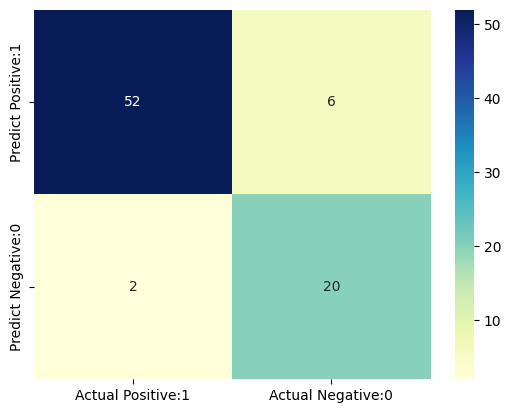

In [132]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [133]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93        58
           1       0.77      0.91      0.83        22

    accuracy                           0.90        80
   macro avg       0.87      0.90      0.88        80
weighted avg       0.91      0.90      0.90        80



In [134]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [135]:
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.9000


In [136]:
precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 0.8966


In [137]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.9630


In [138]:
true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.9630


In [139]:
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.2308


In [140]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.7692
